In [1]:
import model_num as mn
import matplotlib.pyplot as plt
import regex as re
import os
import pprint
from pathlib import Path

LOGFILE:Path = Path("./log.md")
FIGFILE = Path("./figures")

In [2]:
def extract_points(lines)->dict:
    d:dict = dict.fromkeys(mn.get_parameter_names())
    for i in d:
        d[i] = list()
    current_param = None
    for line in lines:
        line:str
        if re.match("## Parameter", line):
            current_param = line[line.index('"'):][1:-2]
        elif re.match("\| \d+\.\d+", line):
            s:list = line.split("|")
            d[current_param].append((float(s[1].strip()), float(s[2].strip())))
    return d

def find_bifurcations(lines)->dict:
    current_param:str = None
    d:dict = dict.fromkeys(mn.get_parameter_names())
    for line in lines:
        if re.match("## Parameter", line):
            current_param = line[line.index('"'):][1:-2]
        elif re.match("Event 0 @", line):
            d[current_param] = float(line[line.index(',') + 2:-2])
    return d

In [3]:
with open(LOGFILE, 'r') as f:
    lines = f.readlines()

if not os.path.exists(FIGFILE):
    os.mkdir(FIGFILE)

# d = find_bifurcations(lines)
# pprint.pprint(d)
# d = extract_points(lines)
# pprint.pprint(d['Cgs'])

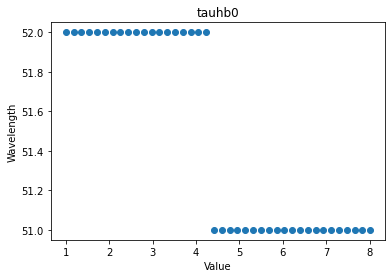

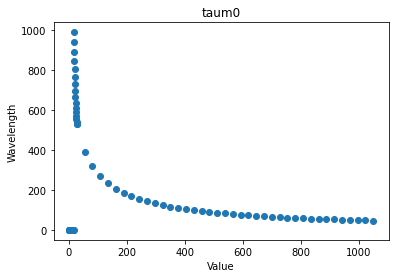

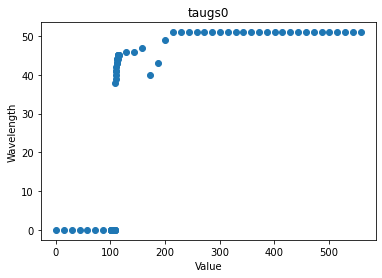

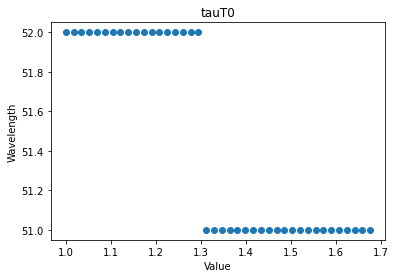

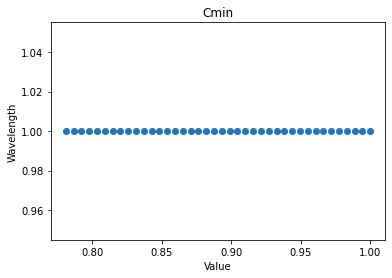

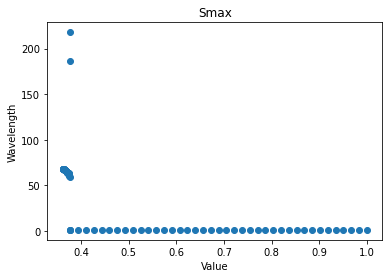

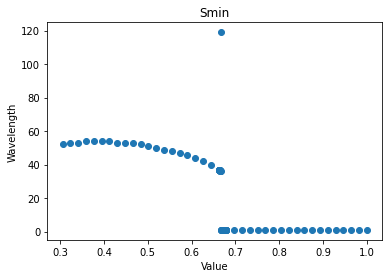

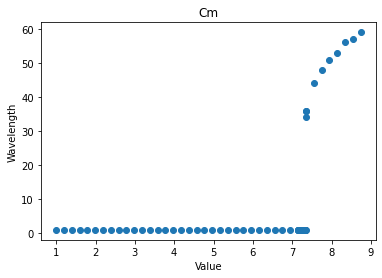

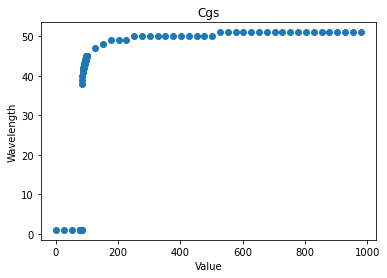

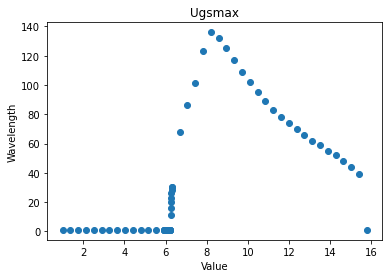

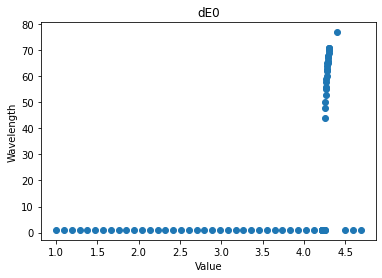

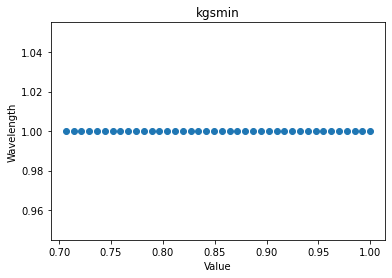

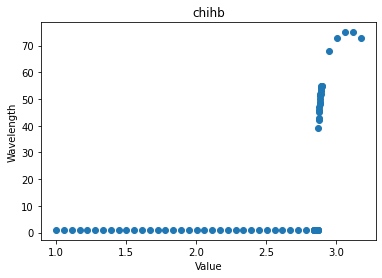

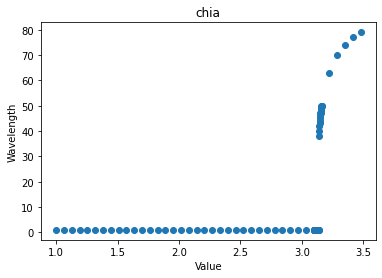

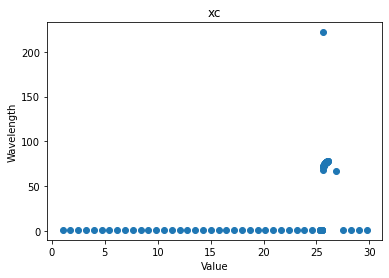

In [12]:
d = extract_points(lines)
i = 0
for p in d:
    i += 1
    # if i > 3: continue
    xs = [z[0] for z in d[p]]
    ys = [z[1] for z in d[p]]
    fig = plt.figure()
    plt.scatter(xs, ys)
    plt.title(p)
    plt.ylabel("Wavelength")
    plt.xlabel("Value")
    plt.savefig(f"./figures/{p}_plot.png")